In [0]:
%pip install rtree 
%pip install geopandas

Python interpreter will be restarted.
Requirement already satisfied: rtree in /databricks/python3/lib/python3.8/site-packages (1.0.0)
Python interpreter will be restarted.
Python interpreter will be restarted.
Requirement already satisfied: geopandas in /databricks/python3/lib/python3.8/site-packages (0.11.1)
Requirement already satisfied: packaging in /databricks/python3/lib/python3.8/site-packages (from geopandas) (20.9)
Requirement already satisfied: pyproj>=2.6.1.post1 in /databricks/python3/lib/python3.8/site-packages (from geopandas) (3.4.0)
Requirement already satisfied: fiona>=1.8 in /databricks/python3/lib/python3.8/site-packages (from geopandas) (1.8.21)
Requirement already satisfied: shapely<2,>=1.7 in /databricks/python3/lib/python3.8/site-packages (from geopandas) (1.8.4)
Requirement already satisfied: pandas>=1.0.0 in /databricks/python3/lib/python3.8/site-packages (from geopandas) (1.2.4)
Requirement already satisfied: munch in /databricks/python3/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (2.5.0)
Requirement already satisfied: setuptools in /usr/local/lib/python3.8/dist-packages (from fiona>=1.8->geopandas) (52.0.0)
Requirement already satisfied: click>=4.0 in /databricks/python3/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (8.1.3)
Requirement already satisfied: cligj>=0.5 in /databricks/python3/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (0.7.2)
Requirement already satisfied: six>=1.7 in /databricks/python3/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (1.15.0)
Requirement already satisfied: attrs>=17 in /databricks/python3/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (20.3.0)
Requirement already satisfied: click-plugins>=1.0 in /databricks/python3/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (1.1.1)
Requirement already satisfied: certifi in /databricks/python3/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (2020.12.5)
Requirement already satisfied: pytz>=2017.3 in /databricks/python3/lib/python3.8/site-packages (from pandas>=1.0.0->geopandas) (2020.5)
Requirement already satisfied: numpy>=1.16.5 in /databricks/python3/lib/python3.8/site-packages (from pandas>=1.0.0->geopandas) (1.20.1)
Requirement already satisfied: python-dateutil>=2.7.3 in /databricks/python3/lib/python3.8/site-packages (from pandas>=1.0.0->geopandas) (2.8.1)
Requirement already satisfied: pyparsing>=2.0.2 in /databricks/python3/lib/python3.8/site-packages (from packaging->geopandas) (2.4.7)
Python interpreter will be restarted.

In [0]:
import rtree, pygeos
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os

In [0]:
os.listdir('/dbfs/FileStore/mike.hudgell@os.uk/')

Out[2]: ['PFA_DEC_2021_EW_BGC.cpg',
 'PFA_DEC_2021_EW_BGC.dbf',
 'PFA_DEC_2021_EW_BGC.prj',
 'PFA_DEC_2021_EW_BGC.shp',
 'PFA_DEC_2021_EW_BGC.shx',
 'Police_Force_Areas__December_2021__EW_BGC.csv',
 'Police_Force_Areas__December_2021__EW_BGC.xml',
 'dft_road_casualty_statistics_accident_last_5_years.csv',
 'dft_road_casualty_statistics_casualty_last_5_years.csv',
 'dft_road_casualty_statistics_vehicle_last_5_years.csv',
 'dsa']

In [0]:
rta = pd.read_csv('/dbfs/FileStore/mike.hudgell@os.uk/dft_road_casualty_statistics_accident_last_5_years.csv')

/databricks/python/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
 has_raised = await self.run_ast_nodes(code_ast.body, cell_name,

In [0]:
geometry = [Point(xy) for xy in zip(rta.location_easting_osgr, rta.location_northing_osgr)]
crs = {'init': 'epsg:27700'} #4326
rta_gdf = gpd.GeoDataFrame(rta, crs=crs, geometry=geometry)

/databricks/python/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
 in_crs_string = _prepare_from_proj_string(in_crs_string)

Out[5]:

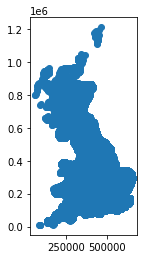

<AxesSubplot:>

In [0]:
rta_gdf.plot()

In [0]:
police_areas_gdf = gpd.read_file('/dbfs/FileStore/mike.hudgell@os.uk/PFA_DEC_2021_EW_BGC.shp')

Out[7]:

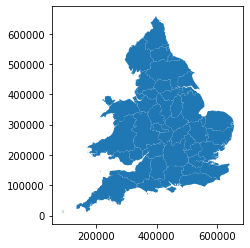

<AxesSubplot:>

In [0]:
police_areas_gdf.plot()

In [0]:
sussex_poly = police_areas_gdf.loc[police_areas_gdf['PFA21NM'] == 'Sussex'] #.geometry

Out[9]:

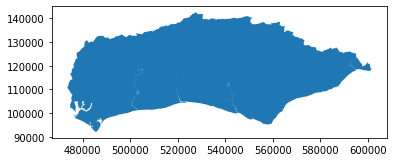

<AxesSubplot:>

In [0]:
sussex_poly.plot()

In [0]:
rta_gdf

Out[10]:

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,geometry
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,3,02:30,28,E09000005,E09000005,3,4006,6,30.0,0,-1,-1,-1,0,0,5,1,1,0,0,1,1,2,E01000543,POINT (519310.000 188730.000)
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,01/11/2016,3,00:37,18,E09000004,E09000004,3,207,6,30.0,9,4,6,0,0,0,4,1,1,0,0,1,1,2,E01000375,POINT (551920.000 174560.000)
2,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,01/11/2016,3,01:25,26,E09000017,E09000017,3,4020,1,30.0,1,4,3,4020,0,0,4,1,1,0,0,1,1,2,E01033725,POINT (505930.000 183850.000)
3,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,01/11/2016,3,09:15,22,E09000024,E09000024,3,217,6,30.0,3,2,3,217,0,0,1,1,1,0,0,1,1,2,E01003379,POINT (527770.000 168930.000)
4,2016010000018,2016,010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,01/11/2016,3,07:53,25,E09000018,E09000018,3,312,3,40.0,0,-1,-1,-1,0,0,1,1,1,0,0,1,1,2,E01002583,POINT (510740.000 177230.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597968,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,12/08/2020,4,14:30,918,S12000042,S12000042,4,959,6,30.0,1,4,4,959,0,0,1,1,1,0,0,1,1,-1,-1,POINT (343034.000 731654.000)
597969,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,13/11/2020,6,15:05,922,S12000011,S12000011,6,0,9,30.0,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1,POINT (257963.000 658891.000)
597970,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,15/04/2020,4,12:42,910,S12000033,S12000033,4,979,6,60.0,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,-1,POINT (383664.000 810646.000)
597971,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,15/12/2020,3,14:00,932,S12000044,S12000044,6,0,6,30.0,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1,POINT (277161.000 674852.000)


In [0]:
sussex_poly

Out[11]:

,OBJECTID,PFA21CD,PFA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,SHAPE_Leng,SHAPE_Area,geometry
32,33,E23000033,Sussex,556570,117296,0.226848,50.933861,{2A204699-2B56-42AD-B396-7F535D40D5FB},711999.620282,3.786718e+09,"MULTIPOLYGON (((483325.407 94764.633, 483268.2..."


In [0]:

sussex_rta = gpd.sjoin(rta_gdf, sussex_poly, how="inner")

Out[13]:

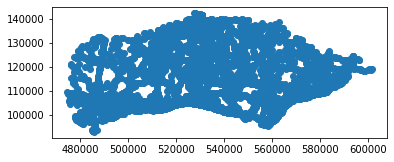

<AxesSubplot:>

In [0]:
sussex_rta.plot()

In [0]:
sussex_rta

Out[14]:

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,geometry,index_right,OBJECTID,PFA21CD,PFA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,SHAPE_Leng,SHAPE_Area
108207,2016471600009,2016,471600009,510617.0,102999.0,-0.431144,50.815918,47,3,3,1,01/01/2016,6,15:46,564,E07000229,E10000032,3,259,1,40.0,1,4,6,0,0,5,1,8,2,0,0,1,1,2,E01031802,POINT (510617.000 102999.000),32,33,E23000033,Sussex,556570,117296,0.226848,50.933861,{2A204699-2B56-42AD-B396-7F535D40D5FB},711999.620282,3.786718e+09
108208,2016471600013,2016,471600013,530194.0,104435.0,-0.152876,50.824758,47,2,2,1,01/01/2016,6,21:50,565,E06000043,E06000043,4,2066,6,20.0,6,2,4,2122,0,5,4,2,2,0,0,1,1,2,E01016953,POINT (530194.000 104435.000),32,33,E23000033,Sussex,556570,117296,0.226848,50.933861,{2A204699-2B56-42AD-B396-7F535D40D5FB},711999.620282,3.786718e+09
108209,2016471600027,2016,471600027,561280.0,98915.0,0.285727,50.767339,47,3,1,1,02/01/2016,7,16:43,551,E07000061,E10000011,5,0,6,30.0,3,4,6,0,0,0,4,2,2,0,0,1,1,2,E01020935,POINT (561280.000 98915.000),32,33,E23000033,Sussex,556570,117296,0.226848,50.933861,{2A204699-2B56-42AD-B396-7F535D40D5FB},711999.620282,3.786718e+09
108210,2016471600031,2016,471600031,521152.0,118158.0,-0.276645,50.950069,47,2,1,2,02/01/2016,7,23:04,562,E07000227,E10000032,3,281,6,40.0,0,-1,-1,-1,0,0,6,1,2,0,0,2,1,2,E01031642,POINT (521152.000 118158.000),32,33,E23000033,Sussex,556570,117296,0.226848,50.933861,{2A204699-2B56-42AD-B396-7F535D40D5FB},711999.620282,3.786718e+09
108211,2016471600034,2016,471600034,548114.0,114306.0,0.105377,50.909161,47,3,1,1,03/01/2016,1,17:35,554,E07000063,E10000011,4,2192,6,60.0,0,-1,-1,-1,0,0,6,5,2,0,0,2,1,2,E01021054,POINT (548114.000 114306.000),32,33,E23000033,Sussex,556570,117296,0.226848,50.933861,{2A204699-2B56-42AD-B396-7F535D40D5FB},711999.620282,3.786718e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583677,2020471011403,2020,471011403,494140.0,100877.0,-0.665495,50.799808,47,3,2,1,22/12/2020,3,14:12,558,E07000224,E10000032,3,29,3,40.0,3,4,6,0,0,8,1,1,2,0,0,1,1,2,E01031402,POINT (494140.000 100877.000),32,33,E23000033,Sussex,556570,117296,0.226848,50.933861,{2A204699-2B56-42AD-B396-7F535D40D5FB},711999.620282,3.786718e+09
583678,2020471011640,2020,471011640,528425.0,105812.0,-0.177483,50.837591,47,3,2,1,30/12/2020,4,18:15,565,E06000043,E06000043,3,2023,6,30.0,3,4,6,0,0,0,4,1,1,0,0,1,2,2,E01016979,POINT (528425.000 105812.000),32,33,E23000033,Sussex,556570,117296,0.226848,50.933861,{2A204699-2B56-42AD-B396-7F535D40D5FB},711999.620282,3.786718e+09
583679,2020471013388,2020,471013388,486352.0,104932.0,-0.775027,50.837476,47,3,2,1,21/12/2020,2,15:00,559,E07000225,E10000032,6,0,6,30.0,3,4,6,0,0,0,1,2,2,0,0,1,2,2,E01031486,POINT (486352.000 104932.000),32,33,E23000033,Sussex,556570,117296,0.226848,50.933861,{2A204699-2B56-42AD-B396-7F535D40D5FB},711999.620282,3.786718e+09
583680,2020471015947,2020,471015947,512557.0,107575.0,-0.402197,50.856738,47,3,2,2,25/11/2020,4,09:27,564,E07000229,E10000032,3,24,6,40.0,3,4,6,0,0,0,1,2,2,0,0,1,1,2,E01031820,POINT (512557.000 107575.000),32,33,E23000033,Sussex,556570,117296,0.226848,50.933861,{2A204699-2B56-42AD-B396-7F535D40D5FB},711999.620282,3.786718e+09


In [0]:
sussex_rta.describe()

Out[16]:

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,index_right,OBJECTID,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area
count,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.00000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.00000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.0,18991.0,18991.0,18991.0,1.899100e+04,18991.000000,18991.000000,1.899100e+04
mean,2017.894845,532337.232005,113084.936022,-0.119320,50.901471,46.999947,2.742615,1.903165,1.31020,4.104629,559.161498,4.249381,508.734980,5.230530,38.739877,2.274393,1.902217,2.943815,145.56511,0.018114,0.770418,2.013480,1.532621,1.294877,0.086567,0.084619,1.422305,1.255911,1.896899,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,711999.620282,3.786718e+09
std,1.389326,26128.888034,12000.760736,0.371476,0.107758,0.007256,0.463968,0.742132,0.72289,1.916546,7.248176,1.394998,834.462816,1.629648,14.992055,2.497425,2.380735,3.155402,515.78090,0.185545,1.949913,1.790304,1.600216,0.544526,0.653974,0.655154,0.493940,0.436383,0.304099,0.0,0.0,0.0,0.0,5.551261e-17,0.000000,0.000000,0.000000e+00
min,2016.000000,474542.000000,92829.000000,-0.941778,50.728749,46.000000,1.000000,1.000000,1.00000,1.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,711999.620282,3.786718e+09
25%,2017.000000,515502.000000,104353.500000,-0.359239,50.824784,47.000000,3.000000,1.000000,1.00000,2.000000,556.000000,3.000000,0.000000,6.000000,30.000000,0.000000,-1.000000,-1.000000,-1.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,711999.620282,3.786718e+09
50%,2018.000000,530143.000000,107882.000000,-0.150394,50.852626,47.000000,3.000000,2.000000,1.00000,4.000000,559.000000,4.000000,27.000000,6.000000,30.000000,2.000000,4.000000,4.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,711999.620282,3.786718e+09
75%,2019.000000,550442.000000,121358.500000,0.139809,50.973178,47.000000,3.000000,2.000000,1.00000,6.000000,563.000000,6.000000,281.000000,6.000000,50.000000,3.000000,4.000000,6.000000,0.00000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,711999.620282,3.786718e+09
max,2020.000000,601302.000000,142472.000000,0.863607,51.167286,47.000000,3.000000,14.000000,12.00000,7.000000,565.000000,6.000000,2718.000000,9.000000,70.000000,9.000000,4.000000,6.000000,2712.00000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,2.000000,2.000000,2.000000,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,711999.620282,3.786718e+09
